# *TASK-1*: **Implementing a LINEAR REGRESSION MODEL for predicting House Prices**

## *Training the Model*

Importing Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the Dataset 
Obtaining the Relevant Features(SqaureFoot, Bedrooms, Bathrooms) dataframe and Target(House Prices) dataframe from the given dataset

In [49]:
dfTrn=pd.read_csv("train.csv")

fetr_Trn=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'HalfBath', 'GarageArea', 'BsmtFullBath', 'BsmtHalfBath']
XTrn=dfTrn[fetr_Trn]

trgt_Trn="SalePrice"
yTrn=dfTrn[trgt_Trn]

Checking for missing values from the Features and filling them(if any)

In [50]:
Xtrn=XTrn.fillna(XTrn.mean())

Spliting the given training data(train.csv) into Test and Train datasets

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XTrn, yTrn, test_size=0.4, random_state=53)

Now, Training the Linear Regression Model by fitting it with the Train set
and By using this model, we predict the values of Test set.

In [52]:
from sklearn.linear_model import LinearRegression

regr=LinearRegression()
regr.fit(X_train, y_train)

y_pred=regr.predict(X_test)

from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:",mse)

Plot the Linear Regression graph between y_test and y_pred

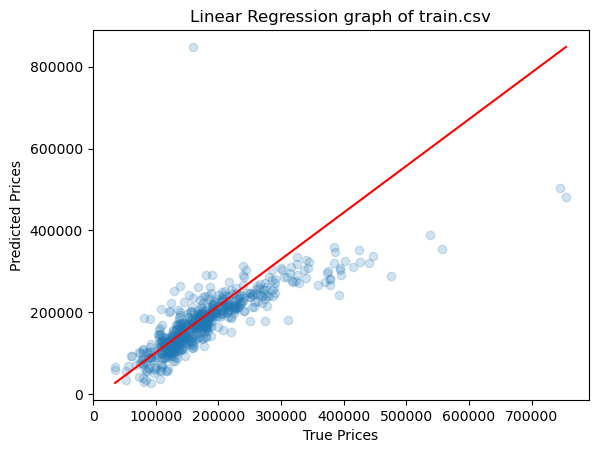

In [53]:
plt.scatter(y_test,y_pred,alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression graph of train.csv")
plt.show()

## *Testing the Model*

Running the test.csv file and predicting the house prices with the help of our Linear Regression Model-"regr" trained with train.csv dataset

In [54]:
dfTst=pd.read_csv("test.csv")

fetr_Tst=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'HalfBath', 'GarageArea', 'BsmtFullBath', 'BsmtHalfBath']
XTst=dfTst[fetr_Tst]

XTst = XTst.fillna(XTst.mean())

pred_Tst=regr.predict(XTst)
ID_list=dfTst.loc[:,"Id"]
yTst=pd.DataFrame({"Id":ID_list,"SalePrice":pred_Tst})
print(yTst)
yTst.to_csv("predicts.csv",index=False)

        Id      SalePrice
0     1461  142468.374863
1     1462  160855.345451
2     1463  192068.313862
3     1464  189318.357428
4     1465  188785.015729
...    ...            ...
1454  2915   76559.959352
1455  2916  100960.523512
1456  2917  156587.455183
1457  2918   72538.620318
1458  2919  234089.687075

[1459 rows x 2 columns]
